In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ajayk\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1=pd.read_csv('matches.csv')
df2=pd.read_csv('deliveries.csv')

In [3]:
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
df1['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [5]:
df2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [57]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [58]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
df1['id'].value_counts()

1        1
509      1
500      1
501      1
502      1
        ..
254      1
255      1
256      1
257      1
11415    1
Name: id, Length: 756, dtype: int64

In [7]:
df2['match_id'].value_counts()

126      267
34       263
534      262
476      262
388      261
        ... 
120      108
568      106
452      100
301       63
11340     51
Name: match_id, Length: 756, dtype: int64

### 1. Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [8]:
merged_df = pd.merge(df1, df2, left_on='id', right_on='match_id')


In [9]:
merged_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### 2. The column which has the most missing values according to the data is: 

In [10]:
merged_df.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
d

### 3. City which hosted most number of seasons according to the data is: 

In [12]:
merged_df['city'].value_counts()

Mumbai            24302
Kolkata           17991
Delhi             17305
Hyderabad         15215
Bangalore         15155
Chennai           13895
Jaipur            11158
Chandigarh        10840
Pune               9119
Durban             3643
Bengaluru          3248
Visakhapatnam      3037
Ahmedabad          2893
Centurion          2866
Mohali             2431
Rajkot             2381
Dharamsala         2159
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Abu Dhabi          1624
Cape Town          1539
Sharjah            1439
Raipur             1431
Kochi              1155
Kanpur              921
Nagpur              742
Kimberley           726
East London         715
Bloemfontein        500
Name: city, dtype: int64

###  4. Which year has the most number of matches played?

In [13]:
merged_df['season'].value_counts()

2013    18177
2012    17767
2011    17013
2010    14498
2019    14328
2014    14300
2018    14290
2016    14096
2017    13862
2015    13652
2009    13606
2008    13489
Name: season, dtype: int64

### 5. Maximum wins by Mumbai Indians in 2011 are

In [14]:
merged_df['winner'].value_counts()

Mumbai Indians                 26305
Chennai Super Kings            24087
Kolkata Knight Riders          21644
Royal Challengers Bangalore    19553
Kings XI Punjab                19469
Rajasthan Royals               17948
Delhi Daredevils               15709
Sunrisers Hyderabad            13786
Deccan Chargers                 7013
Gujarat Lions                   3063
Pune Warriors                   2883
Delhi Capitals                  2436
Rising Pune Supergiant          2383
Kochi Tuskers Kerala            1322
Rising Pune Supergiants         1105
Name: winner, dtype: int64

In [16]:
mi_matches_2011 = merged_df[(merged_df['team1'] == 'Mumbai Indians') | (merged_df['team2'] == 'Mumbai Indians') & (merged_df['season'] == 2011)]

In [19]:
wins_2011 = mi_matches_2011[merged_df['winner'] == 'Mumbai Indians'].shape[0]
print(f"Mumbai Indians' maximum wins in 2011: {wins_2011}")

Mumbai Indians' maximum wins in 2011: 15419


C:\Users\ajayk\AppData\Local\Temp\ipykernel_1868\3053225650.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_2011 = mi_matches_2011[merged_df['winner'] == 'Mumbai Indians'].shape[0]


### 6. For 'toss_decision' feature what kind of plot is suitable? 
    - Bar plot
    - box plot
    - pie plot
    - scatter plot

<AxesSubplot:>

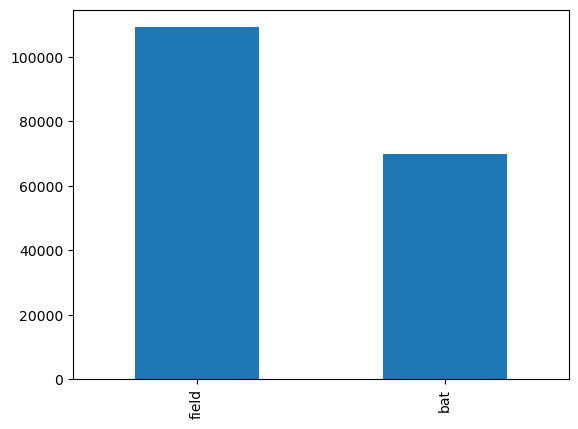

In [29]:
merged_df["toss_decision"].value_counts().plot(kind="bar")

### 7.  What is the percentage of getting bat and field in feature 'toss_descision'? 
- 38.8%, 61.2 %
- 60.5%, 39.5%
- 35.0%, 65.0   %
- None of the above

In [39]:
toss_decision_counts = merged_df['toss_decision'].value_counts()

total_decisions = len(merged_df)
percentage_bat = (toss_decision_counts.get('bat', 0) / total_decisions) * 100
percentage_field = (toss_decision_counts.get('field', 0) / total_decisions) * 100

print(f"Percentage of getting bat: {percentage_bat:.2f}%")
print(f"Percentage of getting field: {percentage_field:.2f}%")

Percentage of getting bat: 39.01%
Percentage of getting field: 60.99%


### 8.  Which statement holds true 
- A) Teams winning tosses and electing field first have won more number of matches.
- B) Teams winning tosses and electing bat first have won more number of matches.
- C) Both A and B
- D) None of the above

In [41]:
bat_wins = merged_df[(merged_df['toss_winner'] == merged_df['winner']) & (merged_df['toss_decision'] == 'bat')].shape[0]
field_wins = merged_df[(merged_df['toss_winner'] == merged_df['winner']) & (merged_df['toss_decision'] == 'field')].shape[0]

if bat_wins > field_wins:
    print("Teams winning tosses and electing bat first have won more number of matches.")
elif field_wins > bat_wins:
    print("Teams winning tosses and electing field first have won more number of matches.")
else:
    print("Both A and B (an equal number of matches won for bat and field decisions).")

Teams winning tosses and electing field first have won more number of matches.


### 9. In which years where taking batting second have won more number of matches?
- A) 2009, 2017
- B) 2013, 2015
- C) 2010, 2015
- D) 2015, 2019 

In [42]:
batting_second_wins = merged_df[merged_df['toss_decision'] == 'field']

batting_second_wins_per_year = batting_second_wins['season'].value_counts()
print("Years where taking batting second has won more matches:")
print(batting_second_wins_per_year)

years_with_more_wins = batting_second_wins_per_year[batting_second_wins_per_year == batting_second_wins_per_year.max()].index
print("Answer:", years_with_more_wins)


Years where taking batting second has won more matches:
2019    11914
2018    11831
2016    11565
2011    11331
2017    11172
2014     9726
2012     8779
2015     7720
2008     7516
2013     7368
2009     5186
2010     5114
Name: season, dtype: int64
Answer: Int64Index([2019], dtype='int64')


### 10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use? 
- line plot
- scatter plot
- count plot
- box plot

<AxesSubplot:>

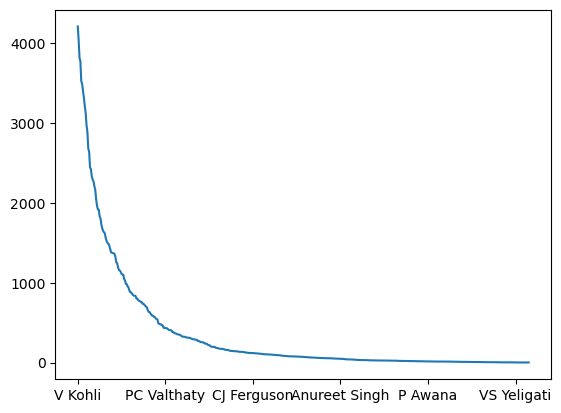

In [50]:
merged_df["batsman"].value_counts().plot(kind="line")

### 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

- AD Russell
- CH Gayle
- KL Rahul
- DA Warner 

In [60]:
# Filter the DataFrame for the year 2019
deliveries_2019 = deliveries_df[merged_df['season'] == 2019]

# Filter for boundaries (4's and 6's)
boundaries_2019 = deliveries_2019[(deliveries_2019['batsman_runs'] == 4) | (deliveries_2019['batsman_runs'] == 6)]

# Group by batsman and calculate the total runs from boundaries
total_runs_by_batsman = boundaries_2019.groupby('batsman')['total_runs'].sum()

# Find the batsman with the highest total runs
top_batsman = total_runs_by_batsman.idxmax()

# Display the result
print("Highest runs from 4's and 6's in 2019:", top_batsman)


Highest runs from 4's and 6's in 2019: AD Russell


### 12. Most number of wickets taken by a bowler is
- SL Malinga
- DJ Bravo
- Amit Mishra
- Harbhajan Singh 

In [62]:
# Filter for wickets taken (non-run-out dismissals)
wickets_df = deliveries_df[merged_df['dismissal_kind'].notna() & (merged_df['dismissal_kind'] != 'run out')]

# Group by bowler and count the number of wickets
wickets_count = wickets_df['bowler'].value_counts()

# Find the bowler with the most wickets
top_bowler = wickets_count.idxmax()

# Display the result
print("Bowler who has taken the most number of wickets:", top_bowler)


Bowler who has taken the most number of wickets: SL Malinga


### 13.  What is the strike rate of Kohli in 2016

` HINT: strike rate = (Total Runs / Total Balls Faced) * 100
- 82.62
- 80.55
- 44.93
- 43.34 

In [71]:
# Filter for Virat Kohli's innings in 2016
kohli_2016 = merged_df[(merged_df['batsman'] == 'V Kohli') & (merged_df['season'] == 2016)]

# Calculate the total runs and total balls faced by Kohli in 2016
total_runs = kohli_2016['total_runs'].sum()
total_balls_faced = kohli_2016.shape[0]

# Calculate the strike rate
strike_rate = (total_runs / total_balls_faced) * 100

# Display the result
print(f"Virat Kohli's strike rate in 2016: {strike_rate:.2f}")


Virat Kohli's strike rate in 2016: 152.37


### 14.  Bowlers with maximum number of extras:
- P Kumar
- DJ Bravo
- SR Watson
- SL Malinga 

### 15. Which venue has hosted most number of IPL matches?
- M Chinnaswamy Stadium
- Feroz Shah Kotla
- Eden Gardens
- Rajiv Gandhi International Stadium 

In [72]:
merged_df['venue'].value_counts()

Eden Gardens                                            17991
Wankhede Stadium                                        17590
M Chinnaswamy Stadium                                   16872
Feroz Shah Kotla                                        15604
Rajiv Gandhi International Stadium, Uppal               13303
MA Chidambaram Stadium, Chepauk                         12006
Sawai Mansingh Stadium                                  11158
Punjab Cricket Association Stadium, Mohali               8266
Maharashtra Cricket Association Stadium                  5055
Subrata Roy Sahara Stadium                               4064
Dr DY Patil Sports Academy                               3993
Kingsmead                                                3643
Punjab Cricket Association IS Bindra Stadium, Mohali     3315
Sardar Patel Stadium, Motera                             2893
SuperSport Park                                          2866
Brabourne Stadium                                        2719
Dr. Y.S.

### 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?
- AB de Villiers
- Yuvraj Singh
- V Kohli
- DA Warner 

### 17. Across seasons who are the top three batsman's with most number of run out?
- MS Dhoni
- Y Venugopal Rao
- S Gill
- RG Sharma
- V Kohli 

### 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?
- 111
- 112
- 113
- 114 

### 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled
- SE Marsh
- SK Raina
- BA Stokes
- RA Jadeja 

### 20. which player has the highest hard-hitting ability?
- AB de Villiers
- CH Gayle
- MS Dhoni
- V Kohli 